In [5]:
# Mounting Google Drive
from google.colab import drive
from os.path import join
ROOT = '/content/drive'
print(ROOT)
drive.mount(ROOT)

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%pwd

'/content'

In [7]:
%cd /content/drive/My\ Drive/Colab Notebooks/ProjectData

/content/drive/My Drive/Colab Notebooks/ProjectData


## Importing the dataset and necessary libraries

In [8]:
from imutils import paths
import numpy as np
import argparse
import imutils
import pickle
import cv2
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
%matplotlib inline

In [9]:
Dataset_path = "FaceRecognition/dataset"
face_detection_path= "FaceRecognition/face_detection_model/res10_300x300_ssd_iter_140000.caffemodel"
proto_path = "FaceRecognition/face_detection_model/deploy.prototxt"
embedding_gen_path = "FaceRecognition/openface_nn4.small2.v1.t7"
output_path = "FaceRecognition/output"

In [10]:
print("Loading face detector.....")
detector = cv2.dnn.readNetFromCaffe(proto_path, face_detection_path)

Loading face detector.....


In [11]:
print("Loading face embedder....")
embedder = cv2.dnn.readNetFromTorch(embedding_gen_path);

Loading face embedder....


In [12]:
imagepath = list(paths.list_images(Dataset_path))


In [13]:
imagepath

['FaceRecognition/dataset/arpan/IMG-20180811-WA0022.jpg',
 'FaceRecognition/dataset/arpan/IMG-20200520-WA0004.jpg',
 'FaceRecognition/dataset/arpan/IMG-20200902-WA0007.jpg',
 'FaceRecognition/dataset/arpan/IMG-20180925-WA0019.jpg',
 'FaceRecognition/dataset/arpan/IMG-20180104-WA0004.jpg',
 'FaceRecognition/dataset/arpan/IMG-20180114-WA0040.jpg',
 'FaceRecognition/dataset/arpan/IMG-20200307-WA0016.jpg',
 'FaceRecognition/dataset/arpan/IMG-20200902-WA0015.jpg',
 'FaceRecognition/dataset/arpan/arpan1.jpg',
 'FaceRecognition/dataset/arpan/IMG_20190210_155413235.jpg',
 'FaceRecognition/dataset/arpan/IMG-20180208-WA0000.jpg',
 'FaceRecognition/dataset/arpan/IMG_20181224_121707408_HDR.jpg',
 'FaceRecognition/dataset/remon/IMG-20191028-WA0035.jpg',
 'FaceRecognition/dataset/remon/IMG-20191228-WA0018.jpg',
 'FaceRecognition/dataset/remon/IMG-20200102-WA0005.jpg',
 'FaceRecognition/dataset/remon/IMG-20190803-WA0002.jpg',
 'FaceRecognition/dataset/remon/IMG-20181027-WA0016.jpg',
 'FaceRecognition

Processing image  0 / 47


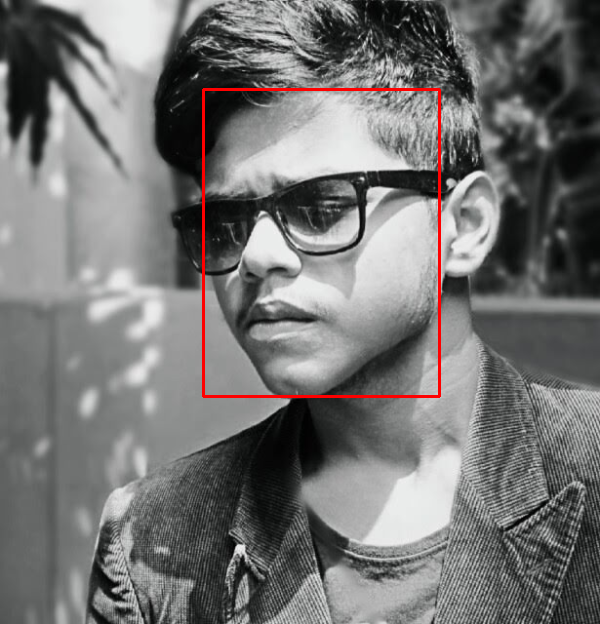

Processing image  1 / 47


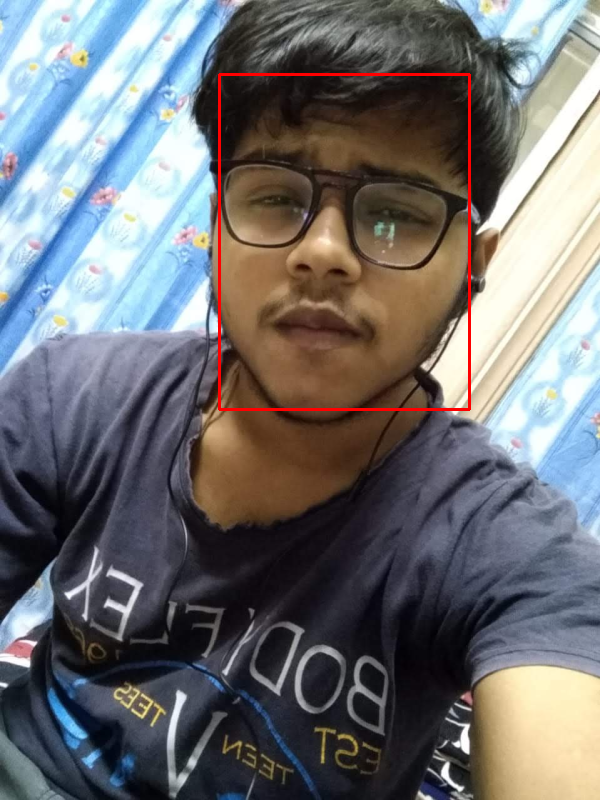

Processing image  2 / 47


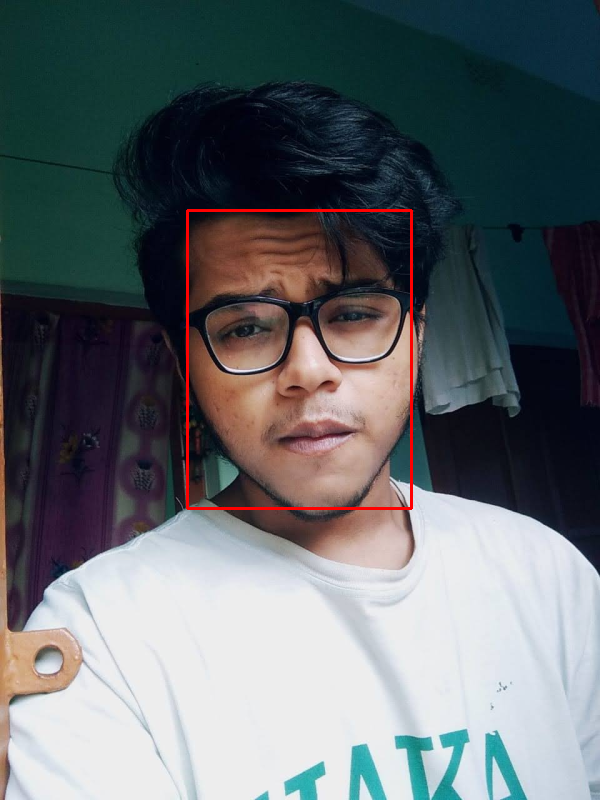

Processing image  3 / 47


In [ ]:
knownEmbeddings = []
knownNames = []
total = 0
for (i, imageP) in enumerate(imagepath):
  print("Processing image ",i,"/",len(imagepath)-1)
  name = imageP.split(os.path.sep)[-2]

  image =  cv2.imread(imageP)
  image = imutils.resize(image, width=600)
  (h,w) = image.shape[:2]
  '''if(i % 5 == 0):
    plt.imshow(image)
    plt.show()
  '''
  blob = cv2.dnn.blobFromImage(cv2.resize(image, (300,300)),1.0, (300,300),(104.0, 177.0, 123.0), swapRB= False, crop = False)
  detector.setInput(blob)
  detections = detector.forward()

  for i in range(0,detections.shape[2]):
    confidence = detections[0,0,i,2];

    if confidence < 0.5:
      continue

    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
    (startX, startY, endX, endY) = box.astype("int")


    cv2.rectangle(image, (startX, startY), (endX, endY), (0,0,255), 2)

    #text = "Confidence: ",confidence
    #image = cv2.putText(image,text,(startX, startY), cv2.FONT_HERSHEY_SIMPLEX , 0.45, (0,0,255),2) 
    face = image[startY:endY, startX:endX]
    (fH, fW) = face.shape[:2]

    if fH < 20 or fW < 20:
      continue

    faceBlob = cv2.dnn.blobFromImage(face, 1/255, (96,96), (0,0,0), swapRB = True, crop= False)

    embedder.setInput(faceBlob)
    vec = embedder.forward()
    knownNames.append(name)
    knownEmbeddings.append(vec.flatten())

    total = total+ 1



  cv2_imshow(image)



In [ ]:
print("Serialising",total, "images and saving it into pickle files")
data = {"name":knownNames, "embedding":knownEmbeddings}
pickcle_path = output_path+"/data.pickle"
f = open(pickcle_path, "wb")
f.write(pickle.dumps(data))
f.close()

In [ ]:
image1 = cv2.imread("FaceRecognition/dataset/arpan/arpan1.jpg")
image1.shape

In [ ]:
detections[0,0,10]

In [ ]:
knownNames

In [ ]:
!pwd

In [ ]:
%cd FaceRecognition/

In [ ]:
!git status

In [ ]:
!git add .


In [ ]:
!git config --global user.email "suranjandaw@gmail.com"
!git config --global user.name "SuranjanDaw"

In [ ]:
!git commit -m"More data added"

In [ ]:
!git remote -v

In [ ]:
!git push origin master

In [ ]:
!git pull origin master

In [ ]:
!git status

In [ ]:
!git commit -m"merging pull"

In [ ]:
!git log --graph --oneline

In [ ]:
!git push origin master